In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/gpfs/group/epo2/default/nxa176/Data_Incubator/Chal#3/CosmicMutantExport.tsv', delimiter='\t')

/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(6721297, 35)

In [3]:
df.columns.values

array(['Gene name', 'Accession Number', 'Gene CDS length', 'HGNC ID',
       'Sample name', 'ID_sample', 'ID_tumour', 'Primary site',
       'Site subtype 1', 'Site subtype 2', 'Site subtype 3',
       'Primary histology', 'Histology subtype 1', 'Histology subtype 2',
       'Histology subtype 3', 'Genome-wide screen', 'Mutation ID',
       'Mutation CDS', 'Mutation AA', 'Mutation Description',
       'Mutation zygosity', 'LOH', 'GRCh', 'Mutation genome position',
       'Mutation strand', 'SNP', 'Resistance Mutation',
       'FATHMM prediction', 'FATHMM score', 'Mutation somatic status',
       'Pubmed_PMID', 'ID_STUDY', 'Sample Type', 'Tumour origin', 'Age'], dtype=object)

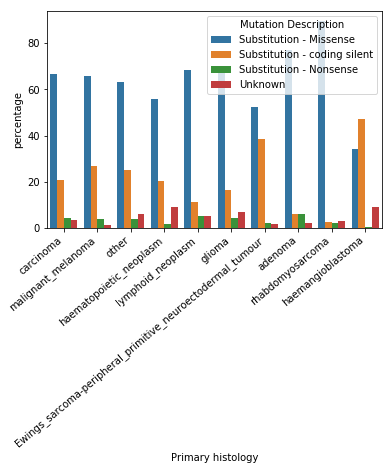

In [4]:
perc_counts = (df.groupby(['Primary histology'])['Mutation Description'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Mutation Description'))
ax = sns.barplot(x='Primary histology', y='percentage',hue='Mutation Description', data=perc_counts, order=df['Primary histology'].value_counts().iloc[:10].index, hue_order=df['Mutation Description'].value_counts().iloc[:4].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [5]:
# Cancer histology where silent mutations are greater than missense mutations
pivoted = perc_counts.pivot_table(values='percentage',columns='Mutation Description', index='Primary histology')
pivoted[pivoted['Substitution - coding silent']> pivoted['Substitution - Missense']]

Mutation Description,Complex,Complex - compound substitution,Complex - deletion inframe,Complex - frameshift,Complex - insertion inframe,Deletion - Frameshift,Deletion - In frame,Frameshift,Insertion - Frameshift,Insertion - In frame,Nonstop extension,Substitution - Missense,Substitution - Nonsense,Substitution - coding silent,Unknown,Whole gene deletion
Primary histology,,,,,,,,,,,,,,,,
haemangioblastoma,NaN,NaN,NaN,0.006923,0.013847,6.770978,1.239269,NaN,0.768485,0.096926,0.006923,34.422598,0.560786,47.036832,9.076433,NaN


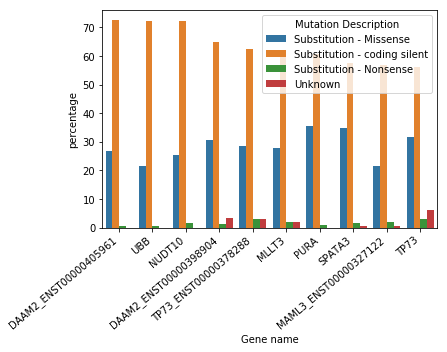

In [6]:
# Filter for genes having data from at least 100 samples. Group them and get the % of samples under different types of mutations
perc_counts_gene = (df.groupby(['Gene name']).filter(lambda x:len(x) >=100).groupby('Gene name')['Mutation Description'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Mutation Description'))

# Plot top 10 gene with maximum % of silent mutations
ax2 = sns.barplot(x='Gene name', y='percentage',hue='Mutation Description', data=perc_counts_gene, order=perc_counts_gene[(perc_counts_gene['Mutation Description']=='Substitution - coding silent')].sort_values('percentage', ascending=False).iloc[:10]['Gene name'].values, hue_order=df['Mutation Description'].value_counts().iloc[:4].index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.show()